In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('C:/Obesity.csv')

In [5]:

df.head()

,Age,Gender,Height,Weight,BMI,Label
0,56,Male,174,72,23.9,Normal weight
1,69,Male,164,90,33.4,Obese
2,46,Female,168,73,25.8,Overweight
3,32,Male,168,85,29.9,Overweight
4,60,Male,184,69,20.5,Normal weight


In [7]:
df.tail()

,Age,Gender,Height,Weight,BMI,Label
995,18,Male,156,64,26.5,Overweight
996,35,Female,165,98,35.8,Obese
997,49,Female,157,79,32.1,Obese
998,64,Male,164,58,21.5,Normal weight
999,66,Female,179,75,23.5,Normal weight


In [9]:
print(f'Total Missing Values: \n{df.isna().sum()}')

Total Missing Values: 
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [11]:
columns = ['Age' , 'Height' , 'Weight' , 'BMI']

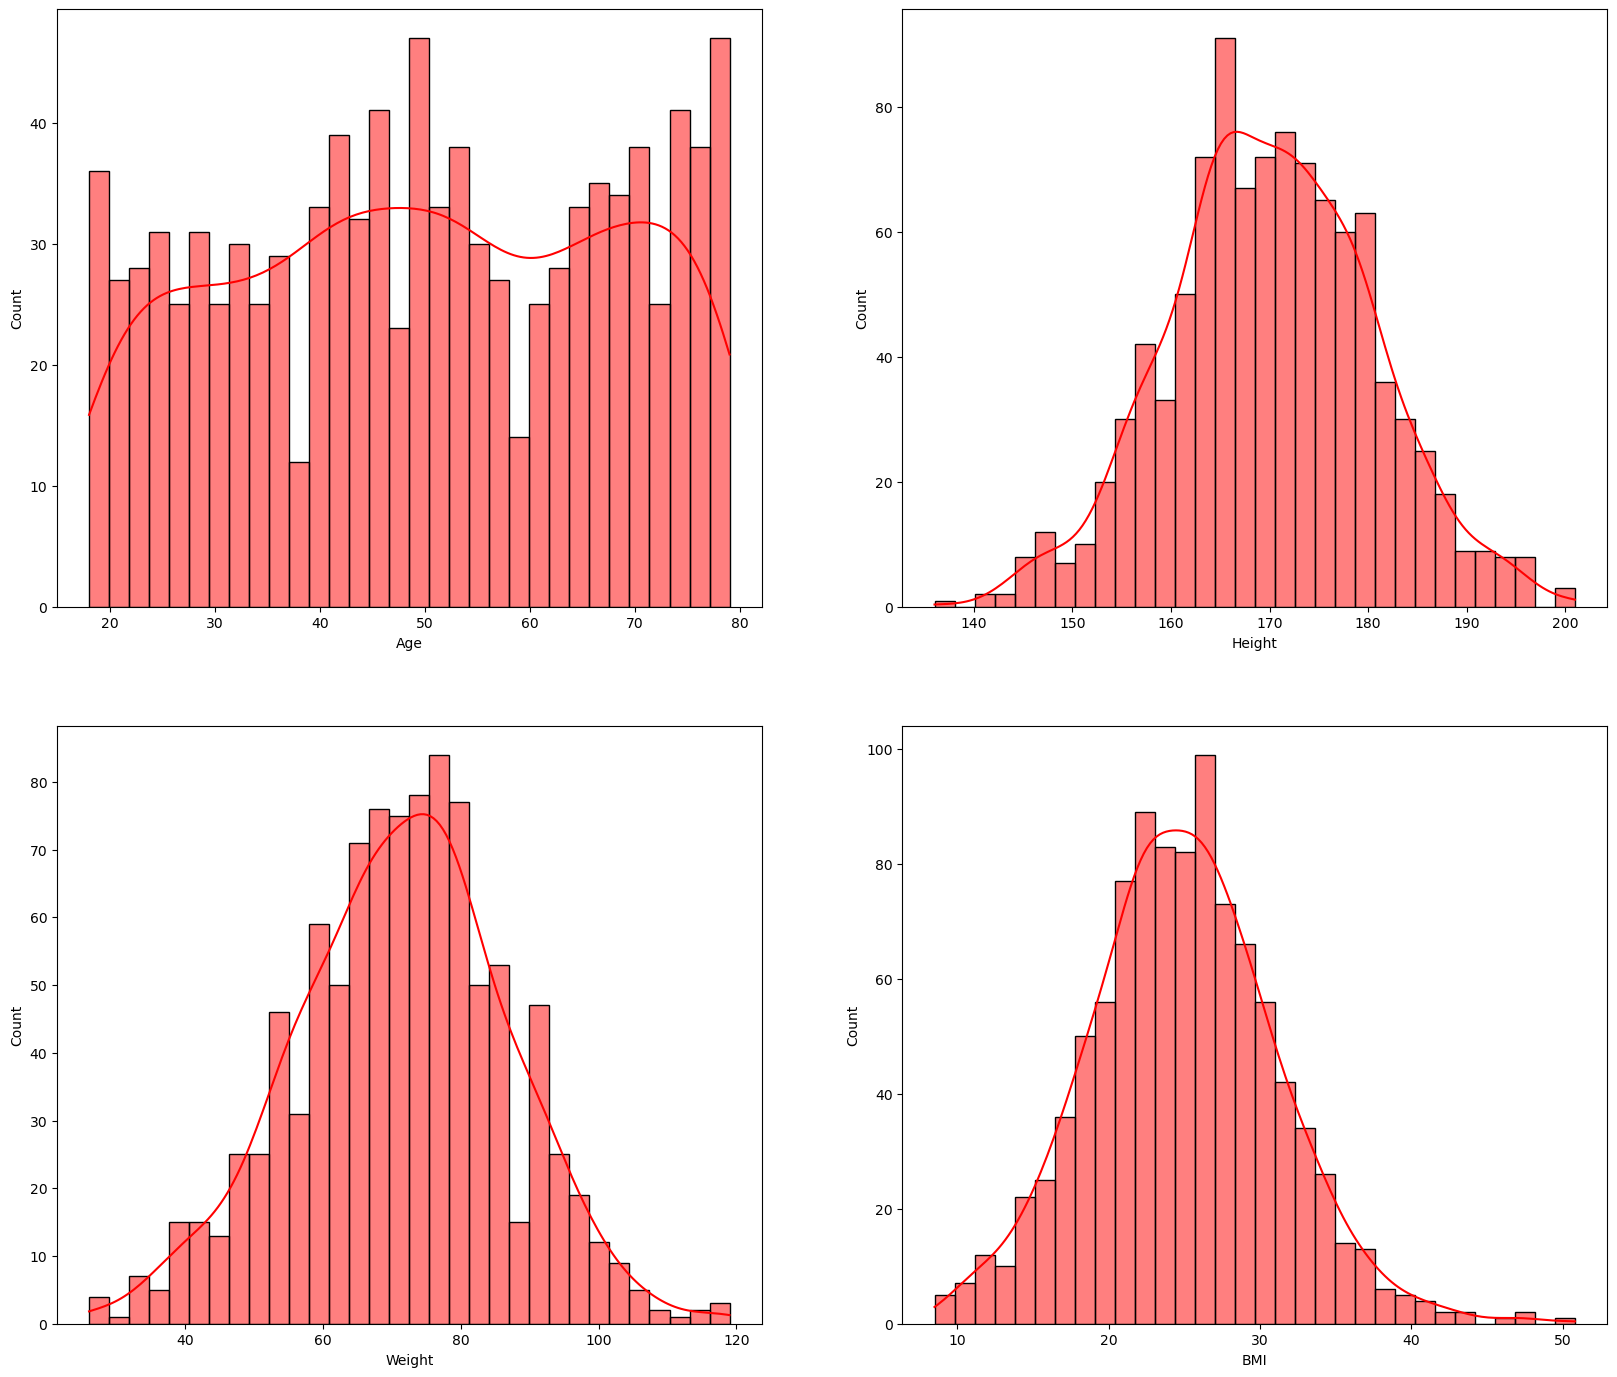

In [13]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'r')
plt.show()

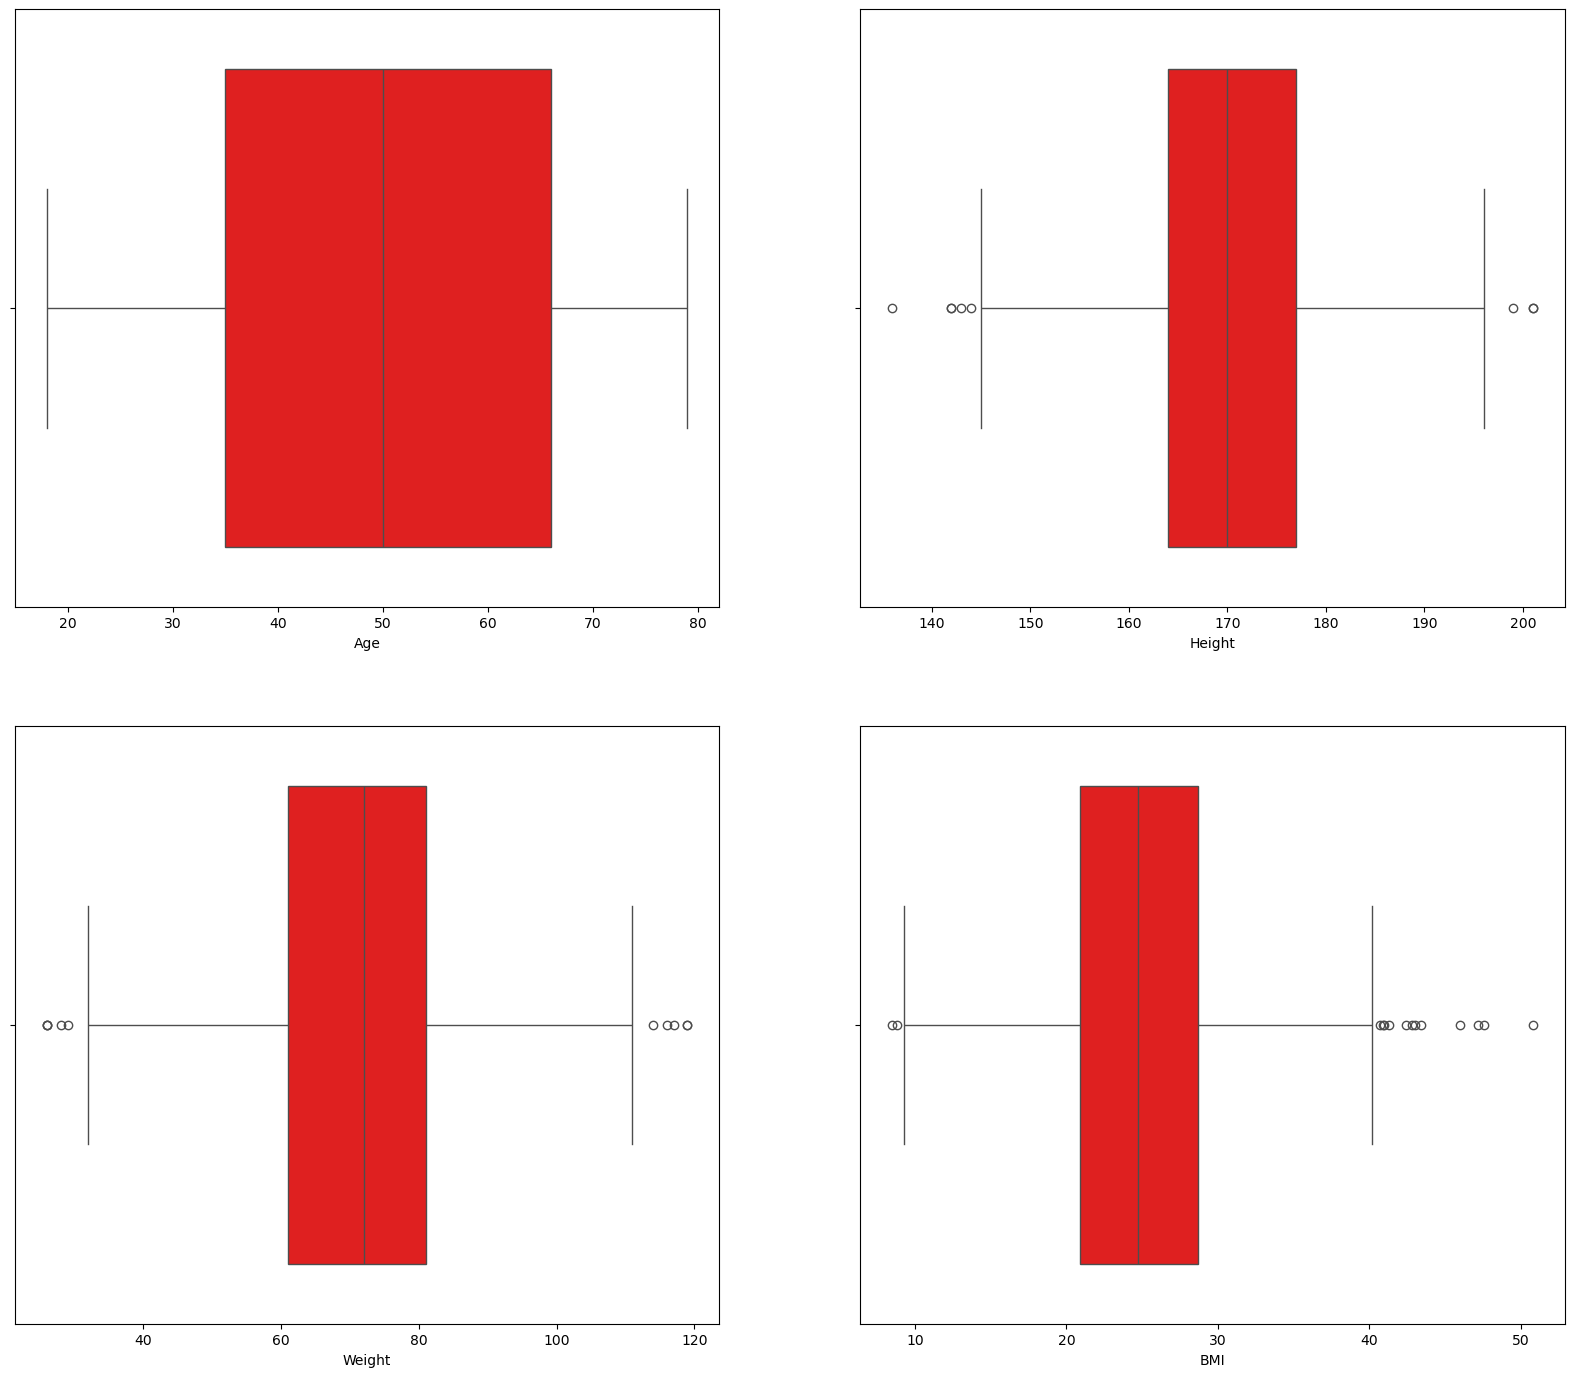

In [15]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'r')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [19]:
num_classes = df['Label'].nunique()

In [21]:
num_classes

4

In [23]:
df['Label'] = pd.factorize(df['Label'])[0]

In [25]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,56,1,174,72,23.9,0
1,69,1,164,90,33.4,1
2,46,0,168,73,25.8,2
3,32,1,168,85,29.9,2
4,60,1,184,69,20.5,0


In [27]:
df.tail()

,Age,Gender,Height,Weight,BMI,Label
995,18,1,156,64,26.5,2
996,35,0,165,98,35.8,1
997,49,0,157,79,32.1,1
998,64,1,164,58,21.5,0
999,66,0,179,75,23.5,0


In [29]:
from scipy import stats
from scipy.stats import zscore

z_scores = zscore(df)
outliers = (np.abs(z_scores)>3)
outliers.sum()

Age       0
Gender    0
Height    3
Weight    2
BMI       4
Label     0
dtype: int64

In [31]:
pearson_coef_val = []
p_val = []

for col in df.columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Label'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [35]:
is_significant = []

for i in p_val:
    if i> 0.1:
        is_significant.append('Tidak')
    else:
        is_significant.append('Ya')
is_significant

['Tidak', 'Tidak', 'Tidak', 'Ya', 'Ya', 'Ya']

In [37]:
data = {
    'Feature': df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,Age,-0.010917,Tidak
1,Gender,-0.036335,Tidak
2,Height,0.029388,Tidak
3,Weight,-0.161975,Ya
4,BMI,-0.139773,Ya
5,Label,1.000000,Ya


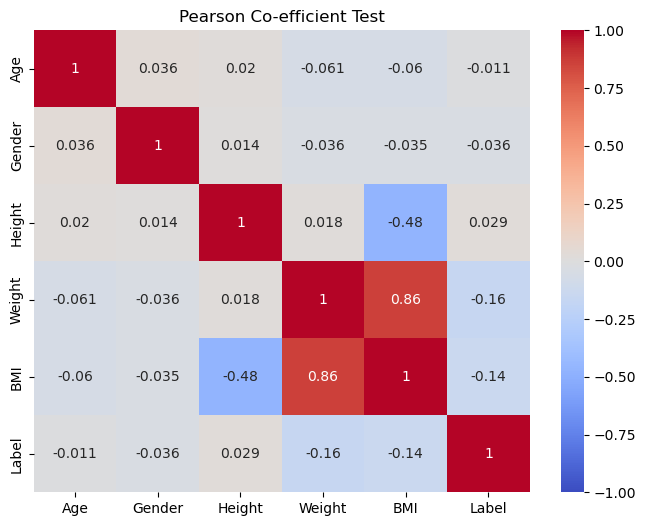

In [39]:
corr_matrix = df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Pearson Co-efficient Test')
plt.show()

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop('Label' , axis = 1)
y = df['Label']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
df.shape

(1000, 6)

In [61]:
clf = GaussianNB()

In [65]:
#run ulang setiap baru buka
clf.fit(X_train_scaled, y_train)

GaussianNB()

In [67]:
y_pred_2 = clf.predict(X_test_scaled)

In [69]:
accuracy_2 = accuracy_score(y_test, y_pred_2)*100

In [71]:
print(f"Accuracy of Naive Bayes Classifier : {accuracy_2}%")

Accuracy of Naive Bayes Classifier : 94.0%
